## Интеллектуальный анализ данных – весна 2021
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

Пропусков в данных нет.
Категориальных признаков тоже нет. Каждый из присутсвующих признаков является числовым. 

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

rand_seed = np.random.seed(113)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rand_seed)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [6]:
n_neighb = [1, 3, 5, 10, 15, 25]
classifiers = []

scaler = StandardScaler()

X_train_subset = X_train[['alcohol', 'magnesium']]
X_test_subset = X_test[['alcohol', 'magnesium']]

scaler.fit(X_train_subset)

X_train_scaled = scaler.transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

print("NN\tTrain\tTest")
for n in n_neighb:
    neighb_n = KNeighborsClassifier(n_neighbors=n)
    classifiers.append(neighb_n)
    neighb_n.fit(X_train_scaled, y_train)
    print("{}\t{:.2f}\t{:.2f}".format(n, neighb_n.score(X_train_scaled, y_train), neighb_n.score(X_test_scaled, y_test)))



NN	Train	Test
1	1.00	0.63
3	0.84	0.69
5	0.80	0.69
10	0.75	0.76
15	0.74	0.74
25	0.72	0.72


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [7]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [8]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

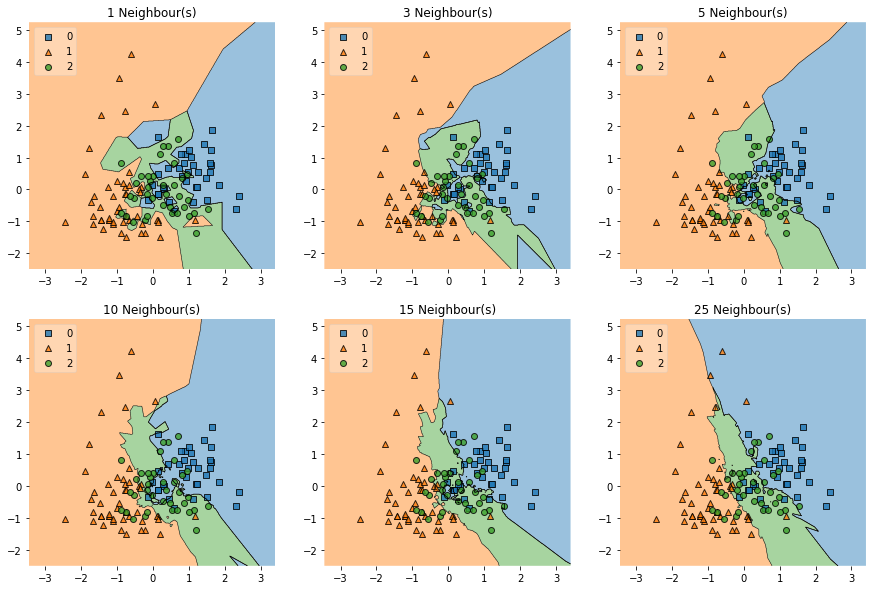

In [9]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,10))

for clf, nn, grd in zip(classifiers, n_neighb, list(itertools.product([0, 1, 2], repeat=2))[:6]):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_scaled,y= y_train, clf=clf, legend=2)
    plt.title(str(nn) + " Neighbour(s)")

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

В задании 1.3 лучшим значением N кажется N=10, потому то именно при нем accuracy на тестовой выборке максимальна. 
Изобразив решаюшую поверхность в задании 1.5, можно сделать следующие выводы:
* При N = 1 наблюдаются небольшие "островки" одного цвета, в которых расположен один объект. Это плохо, потому что это свидетельствует об обучении подели под выбросы
* При N = 3 области не такие "выпуклые", как при N = 5. Это количество соседей тоже неудачное, потому что на картинке наблюдается несколько ситуаций, когда три ближайших соседа разных цветов
* При N = 5 изображение лишено перечисленных выше недостатков
* При N = 10 мы реагируем на группу выбросов лучше, чем при N = 5 (можно обратить внимание на центр картинки и группу зеленых точек чуть выше основной их массы)
* При N = 15, 25 заметно незначительное ухудшение качества определения класса объекта


Таким образом, совокуность данных, полученных из 1.3 и 1.5, позволяет сделать выбор в пользу N = 10

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

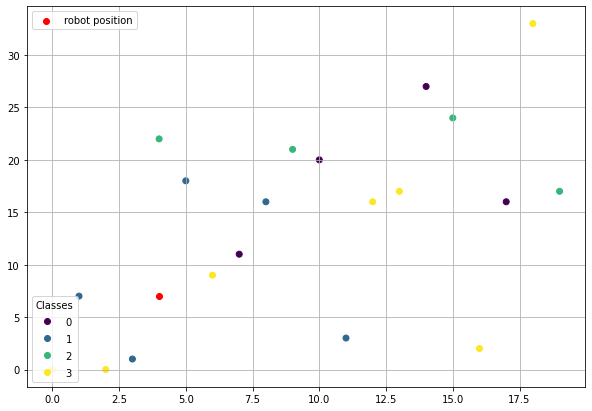

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        knn = KNeighborsClassifier(n_neighbors=k)
        knn = knn.fit(landmarks, classes)
        self.knn = knn
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        decide = np.random.binomial(1, 0.2)
        if decide == 1:
            self.trajectory.append(self.mapping[0].copy())
        else:
            current_class = self.knn.predict(self.trajectory[-1].reshape((1, 2)))[0]
            self.trajectory.append(self.mapping[current_class].copy())

        self.trajectory[-1] += self.trajectory[-2]

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T

    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.set_title(f'k={k}')
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.stack(robot.trajectory)
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

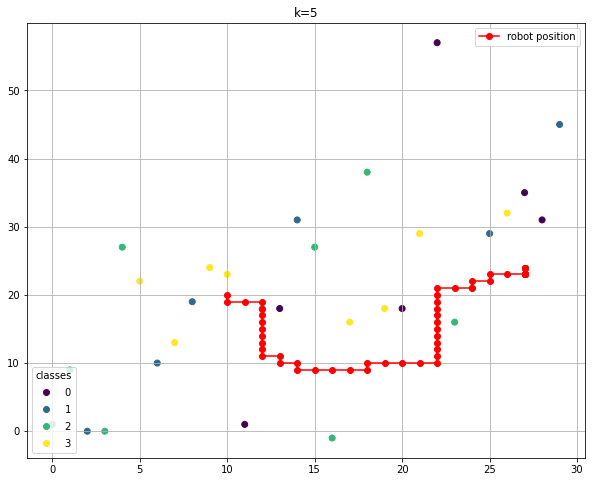

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

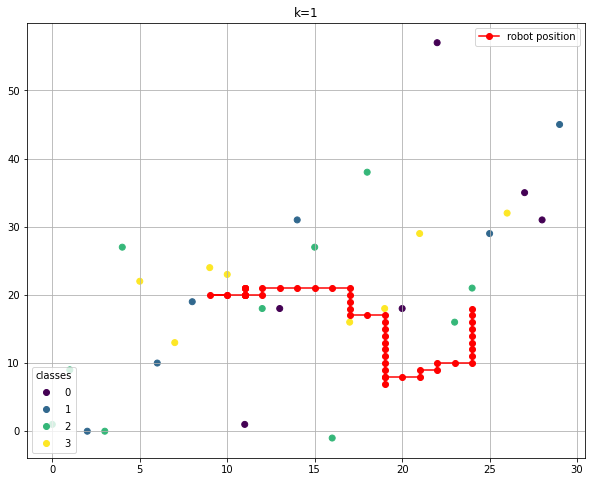

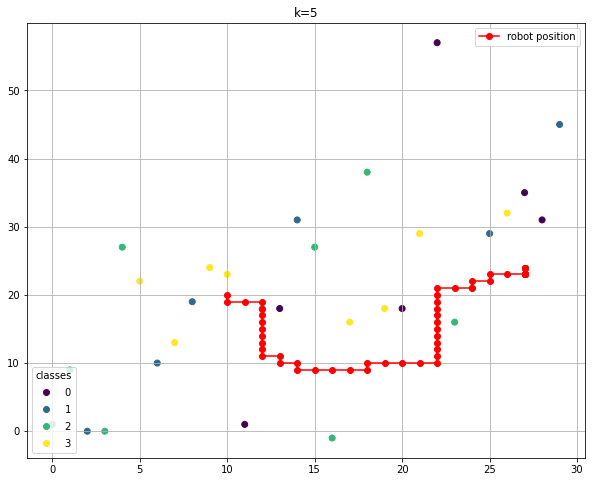

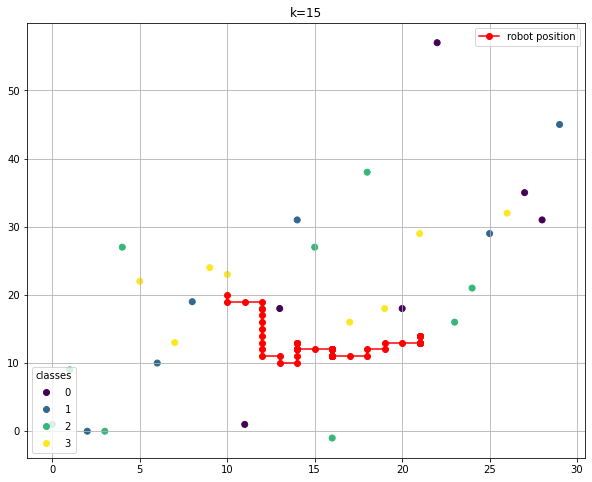

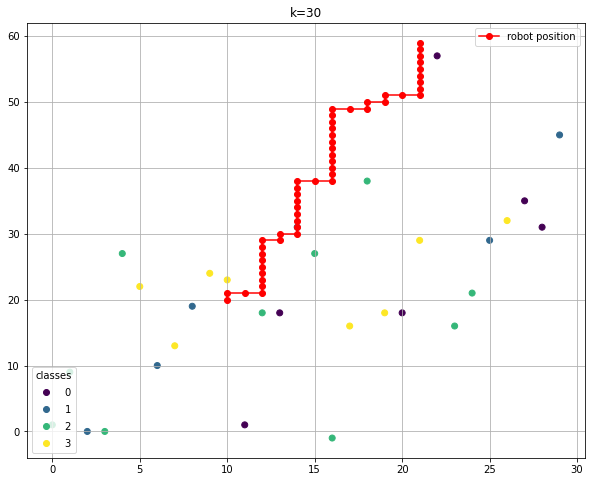

In [15]:
ks = [1, 5, 15, 30]
x = np.arange(30)

for k in ks:
    conduct_experiment(x, mean = 3, std = 10, k = k, n_movements = 50)

При k = 1 робот либо двигается вправо, либо двигается согласно ближайшей метке.

При k = 5 робот уходит вправо, несмотря на то, что в его окрестности не так много точек с меткой 0. Тем не менее, в нижней части "колодца" на графике можно заметить три фиолетовые метки, которые для большинства точек на этом промежутке входят в топ-5 ближайших соседей. В совокупности с движением вправо с вероятностью 0.2 это дает нам очень заметный сдвиг. 

При k = 15 график самый короткий, с всего лишь ~29 различными точками. Это свидетельствует о том, что у нас иногда появлялись "петли" и наложения. Самый заметный участок - это движение вниз из-за большого количества желтых меток на плоскости. 

При k = 30 мы выбрали преобладающий среди всех меток класс (2) и двигались в его направлении (вверх) с немногочисленными сдвигами вправо.

При осознанном назначении меток классам получались бы разные результаты в зависимости от логики назначения. Например, можно было бы задать движение по прямой вправо или попытаться зациклить траекторию, задав метки по четвертям.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
data.isna().sum() #Пропущенных значений нет

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
data = data.drop(axis = 1, labels='Unnamed: 0') #Unnamed: 0 не несет дополнительной информации, 
                                                #потому что отсутствует в описании датасета и, кажется, равен index+1
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [19]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего с ценой коррелируют:
  * carat
  * x
  * y
  * z

В порядке убывания. Меньше признаков выбрать нельзя, так как по этому параметру x, y и z находятся очень близко к друг другу и в то же время далеко от depth и table

Кроме того, видим сильную корреляцию между x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [20]:
# Произведём one-hot-encoding для категориальных признаков
cat_columns=['cut', 'color','clarity']
for col in cat_columns:
    data = data.join(pd.get_dummies(data[col], prefix=f'{col}_'))

In [21]:
data = data.drop(columns=['cut', 'color','clarity'])
data

,carat,depth,table,price,x,y,z,cut__Fair,cut__Good,cut__Ideal,...,color__I,color__J,clarity__I1,clarity__IF,clarity__SI1,clarity__SI2,clarity__VS1,clarity__VS2,clarity__VVS1,clarity__VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
X = data.drop(columns=['price'])
y = data['price']

rand_seed = np.random.seed(113)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=rand_seed)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [23]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)
print("Среднеквадратичная ошибка на тренировочной выборке")
print(np.mean((reg.predict(X_train_scaled) -  y_train) ** 2))

Среднеквадратичная ошибка на тренировочной выборке
1257036.5643599357


In [25]:
print("Среднеквадратичная ошибка на тестовой выборке")
print(np.mean((reg.predict(X_test_scaled) -  y_test) ** 2))

Среднеквадратичная ошибка на тестовой выборке
1323670.8799105142


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [26]:
coef = reg.coef_ #выведем пары признак-коэффициент
zipped = zip(coef, X.columns)
for i in zipped:
    print(i)

(5357.239774716576, 'carat')
(-85.96278809283636, 'depth')
(-54.36558951079343, 'table')
(-1179.2254710080651, 'x')
(-1.2038985132074653, 'y')
(-2.364017854996338, 'z')
(1954954207453636.0, 'cut__Fair')
(3309185239205995.0, 'cut__Good')
(5634522528852623.0, 'cut__Ideal')
(5007663173308485.0, 'cut__Premium')
(4794132094740074.0, 'cut__Very Good')
(1677052302833886.8, 'color__D')
(1954911084491270.8, 'color__E')
(1948325649605505.0, 'color__F')
(2063612985674961.0, 'color__G')
(1824260068081027.8, 'color__H')
(1524574645657428.5, 'color__I')
(1127545576884309.2, 'color__J')
(268135829122998.0, 'clarity__I1')
(406845719741452.9, 'clarity__IF')
(962946135373437.9, 'clarity__SI1')
(845882055081543.4, 'clarity__SI2')
(806645269222356.8, 'clarity__VS1')
(940665875233000.1, 'clarity__VS2')
(560653901662632.1, 'clarity__VVS1')
(656622687741485.8, 'clarity__VVS2')


Коэффициенты при бывших категориальных признаках сильно выше остальных.
То есть, это признаки 

 * 'cut__Fair'
 * 'cut__Good'
 * 'cut__Ideal'
 * 'cut__Premium'
 * 'cut__Very Good'
 * 'color__D'
 * 'color__E'
 * 'color__F'
 * 'color__G'
 * 'color__H'
 * 'color__I'
 * 'color__J'
 * 'clarity__I1'
 * 'clarity__IF'
 * 'clarity__SI1'
 * 'clarity__SI2'
 * 'clarity__VS1'
 * 'clarity__VS2'
 * 'clarity__VVS1'
 * 'clarity__VVS2'
 
 Из изначально числовых признаков на порядок больше остальных по модулю carat и x

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [27]:
from sklearn import linear_model
clf_lasso = linear_model.Lasso(alpha=10)
clf_lasso.fit(X_train_scaled, y_train)

clf_ridge = linear_model.Ridge(alpha=10)
clf_ridge.fit(X_train_scaled, y_train)

Ridge(alpha=10)

In [28]:
coef_lasso = clf_lasso.coef_
coef_ridge = clf_ridge.coef_

In [29]:
zipped = zip(coef_lasso, X.columns)
for i in zipped:
    print(i)

(4896.814381235738, 'carat')
(-53.53168341086434, 'depth')
(-38.03394384599674, 'table')
(-729.3301704056532, 'x')
(-0.0, 'y')
(-13.79129349299871, 'z')
(-132.68271520463492, 'cut__Fair')
(-46.221876612309224, 'cut__Good')
(45.96898426299923, 'cut__Ideal')
(0.0, 'cut__Premium')
(-0.0, 'cut__Very Good')
(141.61922531330188, 'color__D')
(92.41884510675516, 'color__E')
(68.39110244766917, 'color__F')
(-0.0, 'color__G')
(-172.466665205343, 'color__H')
(-283.8423193943127, 'color__I')
(-407.87523814075126, 'color__J')
(-490.8330732646599, 'clarity__I1')
(196.124795452872, 'clarity__IF')
(-260.4024346801088, 'clarity__SI1')
(-581.8808231473672, 'clarity__SI2')
(98.94446083982653, 'clarity__VS1')
(-0.0, 'clarity__VS2')
(178.6169804992089, 'clarity__VVS1')
(188.92728157193244, 'clarity__VVS2')


Для Lasso-регрессии веса бывших категориальных признаков значительно уменьшились, теперь самым "тяжелым" коэффициентом стал коэффициент при carat

In [30]:
zipped = zip(coef_ridge, X.columns)
for i in zipped:
    print(i)

(5316.916548131504, 'carat')
(-83.7387490258494, 'depth')
(-51.08238014957447, 'table')
(-1127.1098977570025, 'x')
(-9.199461070174403, 'y')
(-7.08996159310365, 'z')
(-131.80779810047846, 'cut__Fair')
(-44.95049784254228, 'cut__Good')
(56.048484149120384, 'cut__Ideal')
(14.90994735914378, 'cut__Premium')
(3.328504962510807, 'cut__Very Good')
(206.61835485357412, 'color__D')
(164.1690942891866, 'color__E')
(140.27730204778055, 'color__F')
(58.042265759080415, 'color__G')
(-127.83644195391422, 'color__H')
(-254.07113728660042, 'color__I')
(-390.2024783481857, 'color__J')
(-471.8720085357625, 'clarity__I1')
(250.34494707055765, 'clarity__IF')
(-148.97798075309942, 'clarity__SI1')
(-493.27957496470896, 'clarity__SI2')
(205.36874758380395, 'clarity__VS1')
(107.94685485976821, 'clarity__VS2')
(248.98755392195142, 'clarity__VVS1')
(271.9836549473088, 'clarity__VVS2')


Аналогично для Ridge, видим значительное снижение коэффициентов с самым тяжелым коэффициентом при carat

Веса при бывших категориальных признаках значительно уменьшились. В Lasso-регрессии занулилось по одному признаку из каждой категории, потому что каждый признак задается всеми остальными из своей категории.

Также в матрице корреляции можно было наблюдать сильную корреляцию между x, y и z. Lasso-регрессия также избавилась от признака y.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [31]:
alpha = [0.1, 1, 10, 100, 200]
norms_lasso = []
norms_ridge = []

for a in alpha:
    clf_lasso = linear_model.Lasso(alpha=a)
    clf_lasso.fit(X_train_scaled, y_train)
    
    clf_ridge = linear_model.Ridge(alpha=a)
    clf_ridge.fit(X_train_scaled, y_train)
    
    norms_lasso.append(np.linalg.norm(clf_lasso.coef_))
    norms_ridge.append(np.linalg.norm(clf_ridge.coef_))


C:\Users\sandc\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250538974.1404953, tolerance: 59783125.99361473
  model = cd_fast.enet_coordinate_descent(


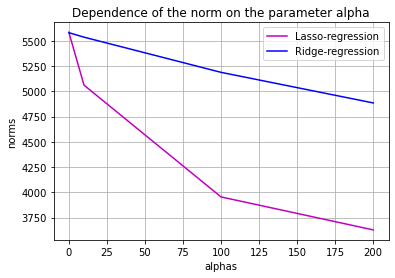

In [32]:
plt.plot(alpha, norms_lasso, color='m')
plt.plot(alpha, norms_ridge, color='b')

plt.xlabel('alphas')
plt.ylabel('norms')
plt.title('Dependence of the norm on the parameter alpha')
plt.legend(['Lasso-regression', 'Ridge-regression'])
plt.grid()
plt.show()

Lasso-регрессия уменьшает веса агрессивнее, чем Ridge-регрессия. Lasso-регрессию могут часто использовать для отбора признаков, потому что 

а) Отбор происходит одновременно с обучением модели (преимущество перед большинством других методов) 

б) В отличие от Ridge-регрессии, Lassо-регрессия уменьшает коэффициенты сильнее и зануляет малоинформативные признаки, являющиеся следствием мультиколлинеарности, а значит, отбирает признаки эффективнее

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [33]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train_scaled, y_train)
alphas = reg.alphas_
mse_matrix = reg.mse_path_

In [34]:
mean_alpha_mse = mse_matrix.mean(axis=1)
optimal_idx = mean_alpha_mse.argmin()
alpha_res = alphas[optimal_idx]
print("Optimal alpha: {} with mean mse {}".format(alpha_res, mean_alpha_mse[optimal_idx]))

Optimal alpha: 3.665474158626455 with mean mse 1260981.9012287906


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [35]:
lasso_reg = linear_model.Lasso(alpha=alpha_res)
lasso_reg.fit(X_train_scaled, y_train)

coefs = lasso_reg.coef_
zipped = zip(coefs, X.columns)
for i in zipped:
    print(i)

(5185.280484100094, 'carat')
(-74.28100531150442, 'depth')
(-46.22582376193753, 'table')
(-1010.5106569043049, 'x')
(-0.0, 'y')
(-7.68417582024181, 'z')
(-135.23781108909944, 'cut__Fair')
(-50.899530170195995, 'cut__Good')
(43.0821835159824, 'cut__Ideal')
(0.0, 'cut__Premium')
(-4.82053011529208, 'cut__Very Good')
(152.90947080775095, 'color__D')
(102.95822796800007, 'color__E')
(79.2863976713988, 'color__F')
(-0.0, 'color__G')
(-176.99515813420018, 'color__H')
(-292.6946329093206, 'color__I')
(-417.31604953395504, 'color__J')
(-498.5593415420977, 'clarity__I1')
(200.60799862542106, 'clarity__IF')
(-259.63834506983335, 'clarity__SI1')
(-587.4220423732995, 'clarity__SI2')
(107.70609957732884, 'clarity__VS1')
(-0.0, 'clarity__VS2')
(182.03819925783986, 'clarity__VVS1')
(193.4945048600399, 'clarity__VVS2')


Lasso-регрессия избавилась от признаков y, cut__Premium, color__G, clarity__VS2

Наиболее информатичными для нас оказались признаки carat и x. 

Это кажется закономерным, потому что бриллианты с большим количеством карат стоят дороже - это считается почти основным параметром, который указывают и узнают при продаже или покупке, с размером бриллианта аналогично.

Наименее информативными оказались группы из бывших категориальных признаков. Скорее всего, это объясняется их высокой корреляцией между собой.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [36]:
print("Среднеквадратичная ошибка на тренировочной выборке")
print(np.mean((lasso_reg.predict(X_train_scaled) -  y_train) ** 2))

Среднеквадратичная ошибка на тренировочной выборке
1258471.4948712701


In [37]:
print("Среднеквадратичная ошибка на тестовой выборке")
print(np.mean((lasso_reg.predict(X_test_scaled) -  y_test) ** 2))

Среднеквадратичная ошибка на тестовой выборке
1323243.663999026


В обычной линейной регрессии среднеквадратичные ошибки были 1257036.5643599357 и 1323670.8799105142 соответственно. 
На тестовой выборке меньшую ошибку дает Lasso-регрессия, поэтому использовать для предсказаний будем ее. 
Скорее всего, она работает лучше за счет исключения малоинформативных признаков и регуляризации. Тем не менее, результаты не сильно различаются, что может быть влиянием выбросов на качество обучения модели.